# <span style="color:green">__Data Science Bootcamp__

## <span style="color:black">__Project__: Exploratory Data Analysis with Python and SQL

---
### <span style="color:navy">__Context__

<span style="color:dark_grey">

Buying or selling a house is mostly an emotional decision that involves both personal experiences and good opportunities at the right time, but it has to be an informed decision to avoid losing money and headaches in the future. That's what this EDA project is all about, analyzing data to provide the best insights and recommendations for the stakeholders involved, both sellers and buyers, to guarantee their satisfaction at the end of the process. 

> ***"Buyers decide in the first eight seconds of seeing a home if they’re interested in buying it. Get out of your car, walk in their shoes and see what they see within the first eight seconds."*** – Barbara Corcoran (American businesswoman, Investor, Shark Tank personality, founder of The Corcoran Group - successful real estate brokerage in New York City)

Here I aim to put the clients' best interests first to maximize their investments, by providing the best cost-benefit balance and recommend them the best properties available in the market in the King County/Seattle - USA.

**Source:** King County Housing Data, containing information about home sales in King County (USA).

**Task:** 
* Choose a stakeholder from the list below
* Generate at least 3 insights regarding the overall data
* Provide at least 3 recommendations of houses for the chosen stakeholder
* Prepare a business presentation for the stakeholder

**Technical:**
* Prepare a Jupyter Notebook with the data processing and analysis for this project
* Provide a README.md file 
* Generate a requirements.txt file

---
### <span style="color:navy">__The Stakeholders__

_Note: As these stakeholders are made up (any resemblance to present people is absolutely random), please make assumptions about answers they would give to your questions. (i.e. How do you define a rich neighborhood? take the zipcodes with most houses in upper 10% percentile..). Whatever assumptions you make, please write them explicitly in your presentation and notebook._

| Name                | Stakeholder | Characteristics                                                                                                                                                                 |
| ------------------- | ----------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Thomas Hansen       | Buyer       | 5 kids, no money, wants nice (social) neighborhood, Timing?, Location?                                                                                                          |
| Charles Christensen | Seller      | Invest with big returns, wondering about renovation?, which Neighborhood? Timing?                                                                                               |
| Bonnie Brown        | Seller      | Has house and wants to move soon (timing?), but wants high profit in middle class NH (neighborhood)                                                                             |
| Larry Sanders       | Buyer       | Waterfront , limited budget, nice & isolated but central neighborhood without kids (but got some of his own, just doesn't his kids to play with other kids .. because of germs) |
| Nicole Johnson      | Buyer       | Lively, central neighborhood, middle price range, right timing (within a year)                                                                                                  |
| Jennifer Montgomery | Buyer       | High budget, wants to show off, timing within a month, waterfront, renovated, high grades year                                                                                  |
| Bonnie Williams     | Seller      | Has several houses, some in bad neighborhoods, willing to evict people, timing?, big returns, open for renovations                                                              |
| William Rodriguez   | Buyer       | 2 people, country (best timing & non-renovated) & city house (fast & central location), wants two houses                                                                        |
| Erin Robinson       | Buyer       | Invest in poor neighborhood, buying & selling, costs back + little profit, socially responsible                                                                                 |
| Jacob Phillips      | Buyer       | Unlimited Budget, 4+ bathrooms or smaller house nearby, big lot (tennis court & pool), golf, historic, no waterfront                                                            |
| Zachary Brooks      | Seller      | Invests in historical houses, best neighborhoods, high profits, best timing within a year, should renovate?                                                                     |
| Timothy Stevens     | Seller      | Owns expensive houses in the center, needs to get rid, best timing within a year, open for renovation when profits rise                                                         |
| Amy Williams        | Seller      | Italian mafiosi, sells several central houses(top10%) over time, needs average outskirt houses over time to hide from the FBI                                                   |


---
### <span style="color:navy">__Chosen Stakeholder: "Jennifer Montgomery"__

**Description**: High budget, wants to show off, timing within a month, waterfront, renovated, high grades year


---
### <span style="color:navy">__Fetching the data__

**Creating a connection to a PostgreSQL database with Python**

Description: 
- SQL query executed both in dBeaver with a PostgreSQL and here in this Jupyter Notebook to acquire a Python object. 
- Dataset was then exported into a .csv file.
- Data was subsequently cleaned, shaped and saved to be analyzed.

In order to create a connection to the PostgreSQL database the following information is needed:

- host = the address of the machine the database is hosted on
- port = the virtual gate number through which communication will be allowed
- database = the name of the database
- user = the name of the user
- password = the password of the user

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Creating a connection to a PostgreSQL database with Python:
import pandas as pd
import psycopg2

# Info needed in .env file, 'dotenv' package needed to read it
import os
from dotenv import load_dotenv

load_dotenv()

DATABASE = os.getenv('DATABASE')
USER_DB = os.getenv('USER_DB')
PASSWORD = os.getenv('PASSWORD')
HOST = os.getenv('HOST')
PORT = os.getenv('PORT')

In [3]:
# Create connection object conn
conn = psycopg2.connect(
    database=DATABASE,
    user=USER_DB,
    password=PASSWORD,
    host=HOST,
    port=PORT
)

cur = conn.cursor()

In [4]:
# Query joining both tables in the dataset to further analyze it:
joint_table = """
SELECT details.*, sales.* 
FROM eda.king_county_house_details details 
FULL OUTER JOIN eda.king_county_house_sales sales 
ON details.id = sales.house_id;
"""

# Import the data into a pandas dataframe
df_houses = pd.read_sql(joint_table, conn)

In [5]:
# Check pandas dataframe
df_houses.head(5)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,...,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0,7129300520,1
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0,6414100192,2
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,...,NaN,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0,5631500400,3
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0,2487200875,4
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0,1954400510,5


In [6]:
# Close the connection
conn.close()

In [7]:
# Export the data to a csv-file
df_houses.to_csv('data/eda_houses.csv',index=False)

# To import the data from a csv-file: "df_import = pd.read_csv('data/eda_houses.csv')"

---
### <span style="color:navy">__Data Cleaning and Adjustments__

**STEP 1** -> Data frame was checked to identify possible duplicated rows in the data frame and it showed that there were no duplicates to be cleaned.

In [8]:
df_houses.duplicated().value_counts() # No duplicates

False    21597
dtype: int64

**STEP 2** -> A missing entries analysis using the package "missingno" was necessary before further corrections could be done. Below the missing entries were identified by column to be further handled. The columns "waterfront", "view", "sqft_basement" and "yr_renovated" were the impacted ones.

In [9]:
import missingno as msno
df_houses.isna().sum()

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
house_id            0
id                  0
dtype: int64

-> After all missing entries were identified above, a matrix was plotted in order to check for patterns of missing data. As no pattern was clearly identified, the missing values were substituted by the value "0", so it wouldn't impact the analysis moving forward.

<AxesSubplot:>

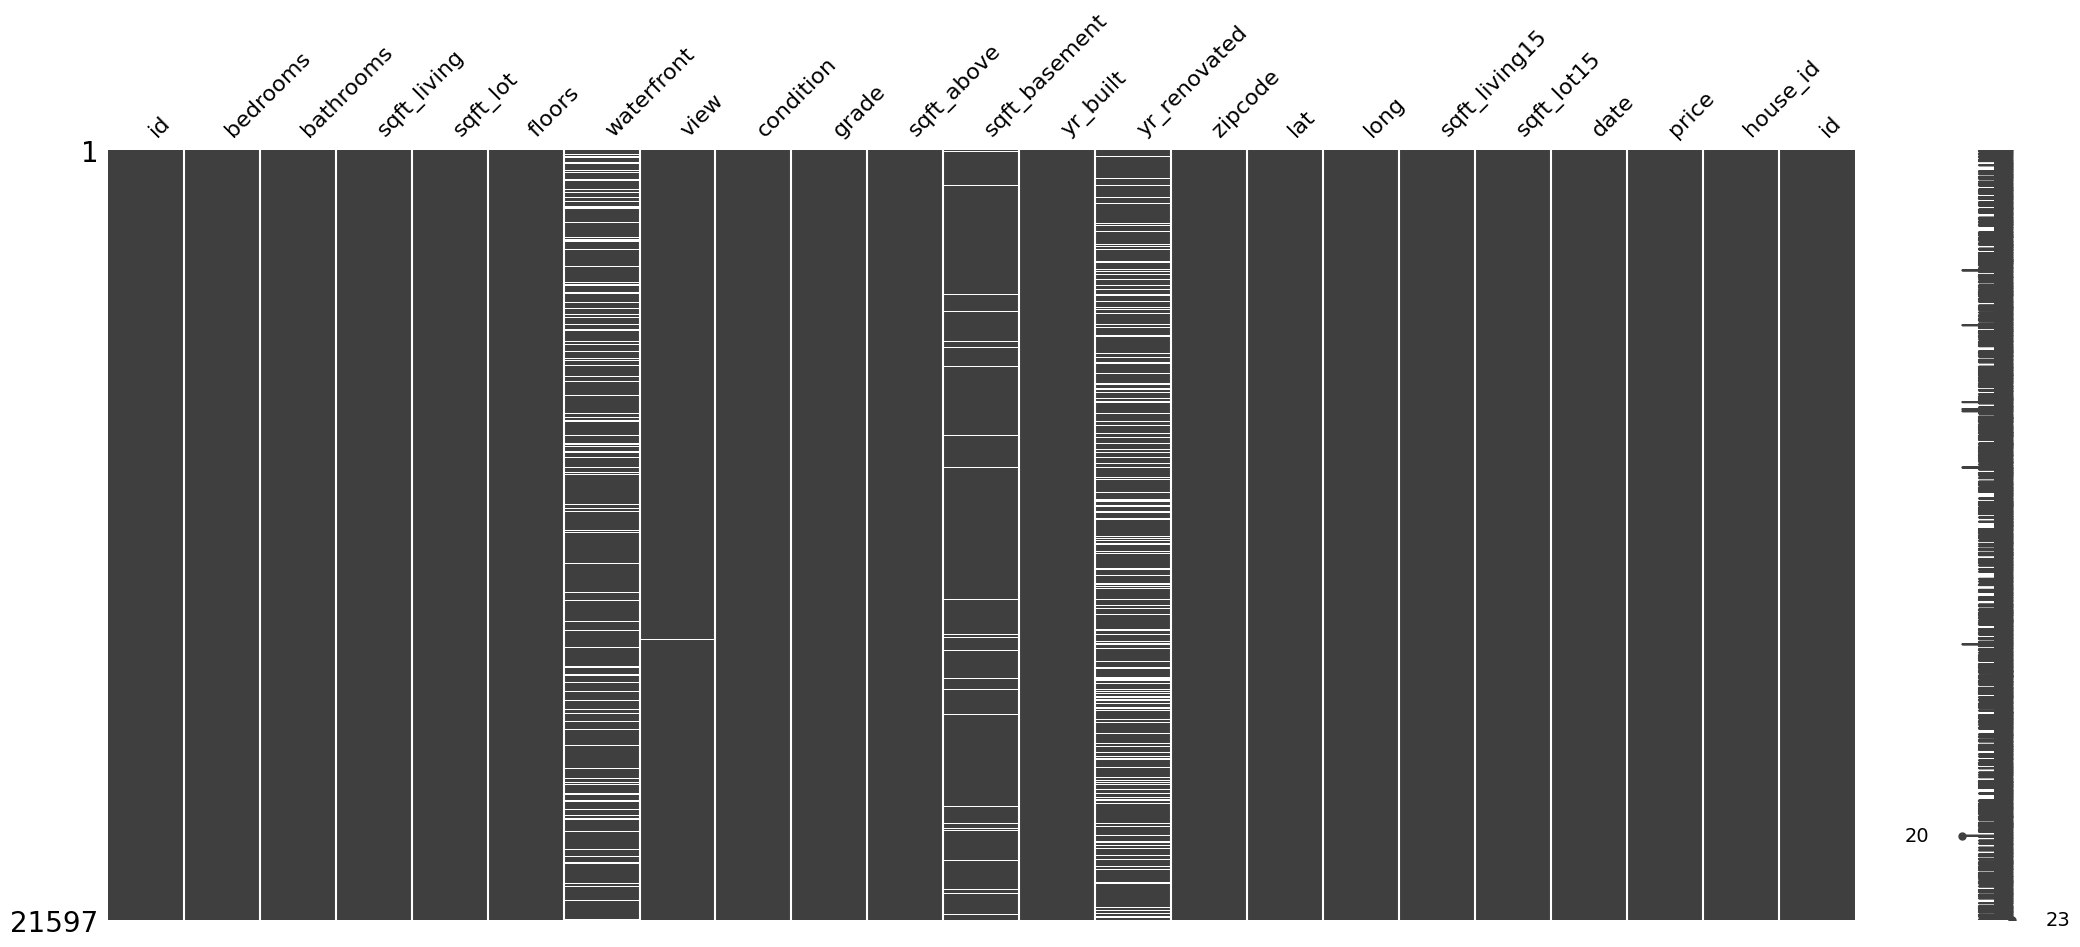

In [10]:
msno.matrix(df_houses)

-> The data frame was copied in order to be further corrected and, subsequently, the missing entries "NA" in the columns "waterfront", "view" and "sqft_basement" changed to value "0":

In [11]:
df_houses_copy = df_houses.copy()
df_houses_copy[['waterfront', 'view', 'sqft_basement']] = df_houses_copy[['waterfront', 'view', 'sqft_basement']].fillna(value=0)
df_houses_copy.isna().sum()


id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
house_id            0
id                  0
dtype: int64

-> Missing values of the column "yr_renovated" were adjusted as below:
* Missing values "0" changed to "NAN"
* Then all "NAN" changed to correspondent "yr_built" 

In [12]:
df_houses_copy['yr_renovated'] = df_houses_copy['yr_renovated'].replace(to_replace=0,value=np.nan)
df_houses_copy.yr_renovated.unique()

array([   nan, 19910., 20020., 20100., 19920., 20130., 19940., 19780.,
       20050., 20030., 19840., 19540., 20140., 20110., 19830., 19450.,
       19900., 19880., 19770., 19810., 19950., 20000., 19990., 19980.,
       19700., 19890., 20040., 19860., 20070., 19870., 20060., 19850.,
       20010., 19800., 19710., 19790., 19970., 19500., 19690., 19480.,
       20090., 20150., 19740., 20080., 19680., 20120., 19630., 19510.,
       19620., 19530., 19930., 19960., 19550., 19820., 19560., 19400.,
       19760., 19460., 19750., 19640., 19730., 19570., 19590., 19600.,
       19670., 19650., 19340., 19720., 19440., 19580.])

In [13]:
df_houses_copy['yr_renovated'] = df_houses_copy['yr_renovated'].fillna(df_houses_copy['yr_built'])
df_houses_copy.head(5)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3,7,...,1955.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0,7129300520,1
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0,6414100192,2
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,...,1933.0,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0,5631500400,3
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,1965.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0,2487200875,4
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,1987.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0,1954400510,5


-> Dataframe "filled_df" created to move forward with the data cleaning process:

In [14]:
filled_df = df_houses_copy
filled_df.isna().sum()

id               0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
date             0
price            0
house_id         0
id               0
dtype: int64

**STEP 3** -> The data types were then checked and some inconsistencies were identified to be corrected.

In [15]:
filled_df.dtypes 

id                 int64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
date              object
price            float64
house_id           int64
id                 int64
dtype: object

-> Correction of the data type in the "date" column to Pandas datetime format:

In [16]:
type(filled_df['date'][0])

datetime.date

In [17]:
filled_df['date'] = pd.to_datetime(filled_df['date'], format='%Y/%m/%d')
type(filled_df['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [18]:
filled_df.date.head(5)

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

-> Correction of the columns "waterfront" and "view" to be integers:

In [19]:
filled_df['waterfront'] = filled_df.waterfront.astype('int')
filled_df.waterfront.dtype

dtype('int64')

In [20]:
filled_df['view'] = filled_df.view.astype('int')
filled_df.view.dtype

dtype('int64')

-> Correction of "yr_renovated" column:
* Data type identified as float and some years written with an additional "0" at the end
* Changed data type to str in order to correct it by removing the extra "0"
* Changed data type to be an integer with year format "YYYY"
* Tested along the way to see if the changes were being done


In [21]:
type(filled_df['yr_renovated'][0])

numpy.float64

-> Additional "0" identified at the end of every year. It was corrected as below:

In [22]:
filled_df.yr_renovated.unique()

array([ 1955., 19910.,  1933.,  1965.,  1987.,  2001.,  1995.,  1963.,
        1960.,  2003.,  1942.,  1927.,  1977.,  1900.,  1979.,  1994.,
        1916.,  1921.,  1969.,  1947.,  1968.,  1985.,  1941.,  1915.,
        1909.,  1948.,  2005.,  1929.,  1981., 20020.,  1904.,  1996.,
        2000.,  1984.,  2014.,  1922.,  1959.,  1966.,  1953.,  1950.,
        2008.,  1991.,  1954.,  1973.,  1925.,  1989.,  1972.,  1986.,
        1956.,  2002.,  1992.,  1964.,  1952.,  1961.,  2006.,  1988.,
        1962.,  1939.,  1967.,  1975.,  1980.,  1910.,  1983., 20100.,
        1978.,  1905.,  1971.,  2010.,  1945.,  1924.,  1990., 19920.,
        1926.,  2004.,  1923.,  2007., 20130.,  1976.,  1949.,  1999.,
        1901.,  1993.,  1920.,  1997.,  1943., 19940., 19780., 20050.,
        1940.,  1918.,  1928.,  1974.,  1911.,  1930.,  1936.,  1937.,
        1982., 20030.,  1908.,  1931.,  1957.,  1998.,  1913.,  2013.,
       19840.,  1907., 19540., 20140.,  1958., 20110.,  2012.,  1912.,
      

In [23]:
filled_df['yr_renovated'] = filled_df.yr_renovated.astype('str')
type(filled_df['yr_renovated'][0])

str

In [24]:
filled_df['yr_renovated'] = filled_df.yr_renovated.str[0:4]
filled_df.yr_renovated.unique()

array(['1955', '1991', '1933', '1965', '1987', '2001', '1995', '1963',
       '1960', '2003', '1942', '1927', '1977', '1900', '1979', '1994',
       '1916', '1921', '1969', '1947', '1968', '1985', '1941', '1915',
       '1909', '1948', '2005', '1929', '1981', '2002', '1904', '1996',
       '2000', '1984', '2014', '1922', '1959', '1966', '1953', '1950',
       '2008', '1954', '1973', '1925', '1989', '1972', '1986', '1956',
       '1992', '1964', '1952', '1961', '2006', '1988', '1962', '1939',
       '1967', '1975', '1980', '1910', '1983', '2010', '1978', '1905',
       '1971', '1945', '1924', '1990', '1926', '2004', '1923', '2007',
       '2013', '1976', '1949', '1999', '1901', '1993', '1920', '1997',
       '1943', '1940', '1918', '1928', '1974', '1911', '1930', '1936',
       '1937', '1982', '1908', '1931', '1957', '1998', '1913', '1907',
       '1958', '2011', '2012', '1912', '1917', '1946', '1951', '1932',
       '1944', '1902', '2009', '1970', '2015', '1934', '1938', '1919',
      

In [25]:
filled_df['yr_renovated'] = filled_df.yr_renovated.astype('int')
type(filled_df['yr_renovated'][0])

numpy.int64

In [26]:
filled_df.yr_renovated.head(5)

0    1955
1    1991
2    1933
3    1965
4    1987
Name: yr_renovated, dtype: int64

**STEP 4** -> Checked finally to see if all columns were in the correct data type

In [27]:
filled_df.dtypes

id                        int64
bedrooms                float64
bathrooms               float64
sqft_living             float64
sqft_lot                float64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above              float64
sqft_basement           float64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15           float64
sqft_lot15              float64
date             datetime64[ns]
price                   float64
house_id                  int64
id                        int64
dtype: object

In [28]:
filled_df['bedrooms'] = filled_df.bedrooms.astype('int')
type(filled_df['bedrooms'][0])

numpy.int64

In [29]:
filled_df['bathrooms'] = filled_df.bathrooms.astype('int')
type(filled_df['bathrooms'][0])

numpy.int64

In [30]:
filled_df['sqft_living'] = filled_df.sqft_living.astype('int')
type(filled_df['sqft_living'][0])

numpy.int64

In [31]:
filled_df['sqft_lot'] = filled_df.sqft_lot.astype('int')
type(filled_df['sqft_lot'][0])

numpy.int64

In [32]:
filled_df['floors'] = filled_df.floors.astype('int')
type(filled_df['floors'][0])

numpy.int64

In [33]:
filled = filled_df.drop(columns=['sqft_above', 'sqft_basement'])

In [34]:
filled.dtypes

id                        int64
bedrooms                  int64
bathrooms                 int64
sqft_living               int64
sqft_lot                  int64
floors                    int64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15           float64
sqft_lot15              float64
date             datetime64[ns]
price                   float64
house_id                  int64
id                        int64
dtype: object

**STEP 5** -> Saved new csv file after the dataframe was cleaned and adjusted:

In [35]:
filled.to_csv('data/eda_houses_clean.csv',index=False)

---
### <span style="color:navy">__Understanding the Client's needs and their requirements for the property__



**TOPIC:** Research Questions and Hypothesis Generation for Ms. Jennifer Montgomery

**FOCUS:** Does more money get you a better house within your requirements?

| # | Questions to be clarified today | Hypotheses | 
| ---- | ------------------------------------------------ | ---------------------------------------------------------------------------------- |
| 1 | Is there a relationship between high grades and the property's price? | High grades increase the property's price. |   
| 2 | Should you choose by price or by grade? | Choosing by grade is a better approach, as some houses are just too overpriced.|
| 3 | Should we focus on bigger living spaces or on bigger lots? | Big lots have bigger houses. |
| 4 | Should we focus on more expensive houses to get a bigger living space with more bedrooms and bathrooms? | The more expensive it is, more it has to offer.  |

| # | Questions to be clarified another day | Hypotheses | 
| ---- | ------------------------------------------------ | ---------------------------------------------------------------------------------- |
| 5 | Does a renovation really add value to the property or is it just a facade to charge more? | It adds value to the house and are therefore more expensive. |
| 6 | How much more expensive is to get a property with a waterfront? | At least 20% more expensive than other equivalent properties. |

---
### <span style="color:navy">__Analysis of the properties__

* Import data to be analyzed and did further cleaning:

In [36]:
df_clean = pd.read_csv('data/eda_houses_clean.csv')

In [37]:
df_clean = df_clean[df_clean.bedrooms != 33]

In [38]:
df_clean.bedrooms.unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10])

> **Dataframe restricted to some values:**

In [39]:
df_filter = df_clean[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'price', 'zipcode']]
df_filter

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,price,zipcode
0,3,1,1180,5650,1,0,0,3,7,221900.0,98178
1,3,2,2570,7242,2,0,0,3,7,538000.0,98125
2,2,1,770,10000,1,0,0,3,6,180000.0,98028
3,4,3,1960,5000,1,0,0,5,7,604000.0,98136
4,3,2,1680,8080,1,0,0,3,8,510000.0,98074
...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2,1530,1131,3,0,0,3,8,360000.0,98103
21593,4,2,2310,5813,2,0,0,3,8,400000.0,98146
21594,2,0,1020,1350,2,0,0,3,7,402101.0,98144
21595,3,2,1600,2388,2,0,0,3,8,400000.0,98027


> **Took a look at the statistics of the column "Price":**

In [40]:
df_filter.price.describe()

count    2.159600e+04
mean     5.402920e+05
std      3.673760e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

> **Prepared some Boxplots:**

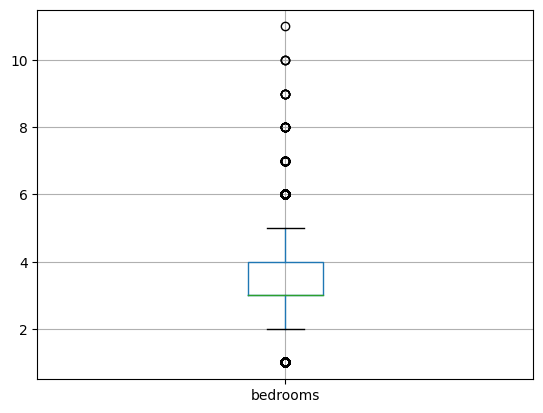

In [41]:
boxplot = df_filter.boxplot(column=['bedrooms']) 

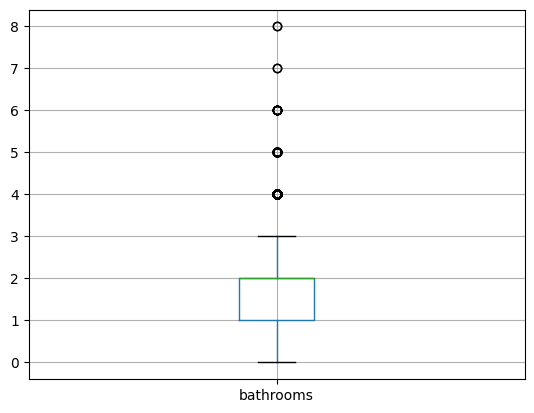

In [42]:
boxplot = df_filter.boxplot(column=['bathrooms']) 

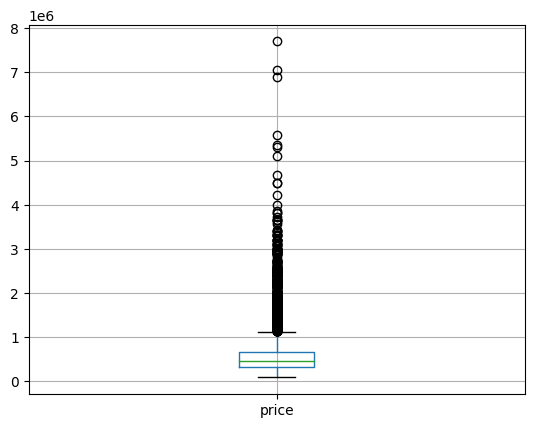

In [43]:
boxplot = df_filter.boxplot(column=['price']) 

> **Correlation was calculated for this dataframe, as below:**

In [44]:
df_filter.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,price,zipcode
bedrooms,1.000000,0.479004,0.593178,0.033602,0.163177,-0.002054,0.080741,0.023440,0.366174,0.315961,-0.158588
bathrooms,0.479004,1.000000,0.698588,0.086021,0.486385,0.059584,0.175102,-0.127233,0.607148,0.510657,-0.160461
sqft_living,0.593178,0.698588,1.000000,0.173449,0.353360,0.104635,0.281710,-0.059397,0.762776,0.701929,-0.199793
sqft_lot,0.033602,0.086021,0.173449,1.000000,-0.008612,0.021458,0.075052,-0.008806,0.114726,0.089879,-0.129582
floors,0.163177,0.486385,0.353360,-0.008612,1.000000,0.018318,0.023700,-0.293416,0.473263,0.237279,-0.097131
waterfront,-0.002054,0.059584,0.104635,0.021458,0.018318,1.000000,0.380543,0.016659,0.082817,0.264308,0.028925
view,0.080741,0.175102,0.281710,0.075052,0.023700,0.380543,1.000000,0.045663,0.249077,0.393502,0.085066
condition,0.023440,-0.127233,-0.059397,-0.008806,-0.293416,0.016659,0.045663,1.000000,-0.146854,0.036031,0.002835
grade,0.366174,0.607148,0.762776,0.114726,0.473263,0.082817,0.249077,-0.146854,1.000000,0.667964,-0.185761
price,0.315961,0.510657,0.701929,0.089879,0.237279,0.264308,0.393502,0.036031,0.667964,1.000000,-0.053409


> **Correlation Matrix:**

Text(0.5, 1.0, 'Correlation Matrix')

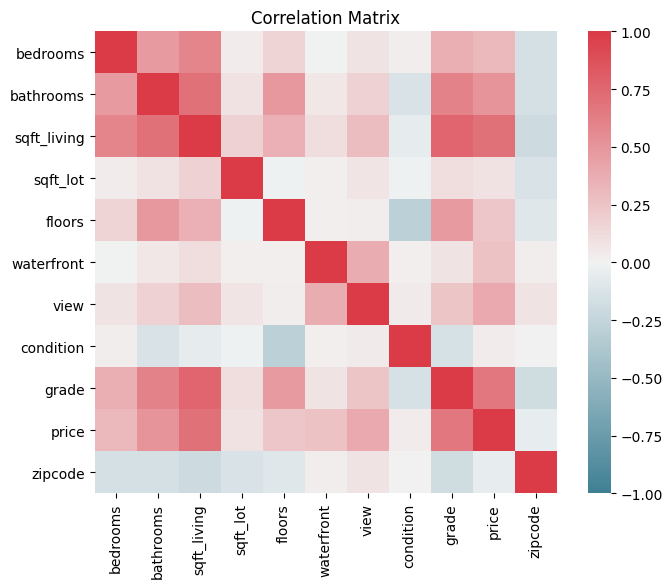

In [45]:
import seaborn as sns

f, ax = plt.subplots(figsize=(8, 6))
corr = df_filter.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
plt.title('Correlation Matrix')

> **Looking deeper into the correlation results:**

In [46]:
c = df_filter.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")

print(so)

waterfront   bedrooms       0.002054
bedrooms     waterfront     0.002054
zipcode      condition      0.002835
condition    zipcode        0.002835
sqft_lot     floors         0.008612
                              ...   
             sqft_lot       1.000000
sqft_living  sqft_living    1.000000
bathrooms    bathrooms      1.000000
price        price          1.000000
zipcode      zipcode        1.000000
Length: 121, dtype: float64


> **Pairplot Correlations:**

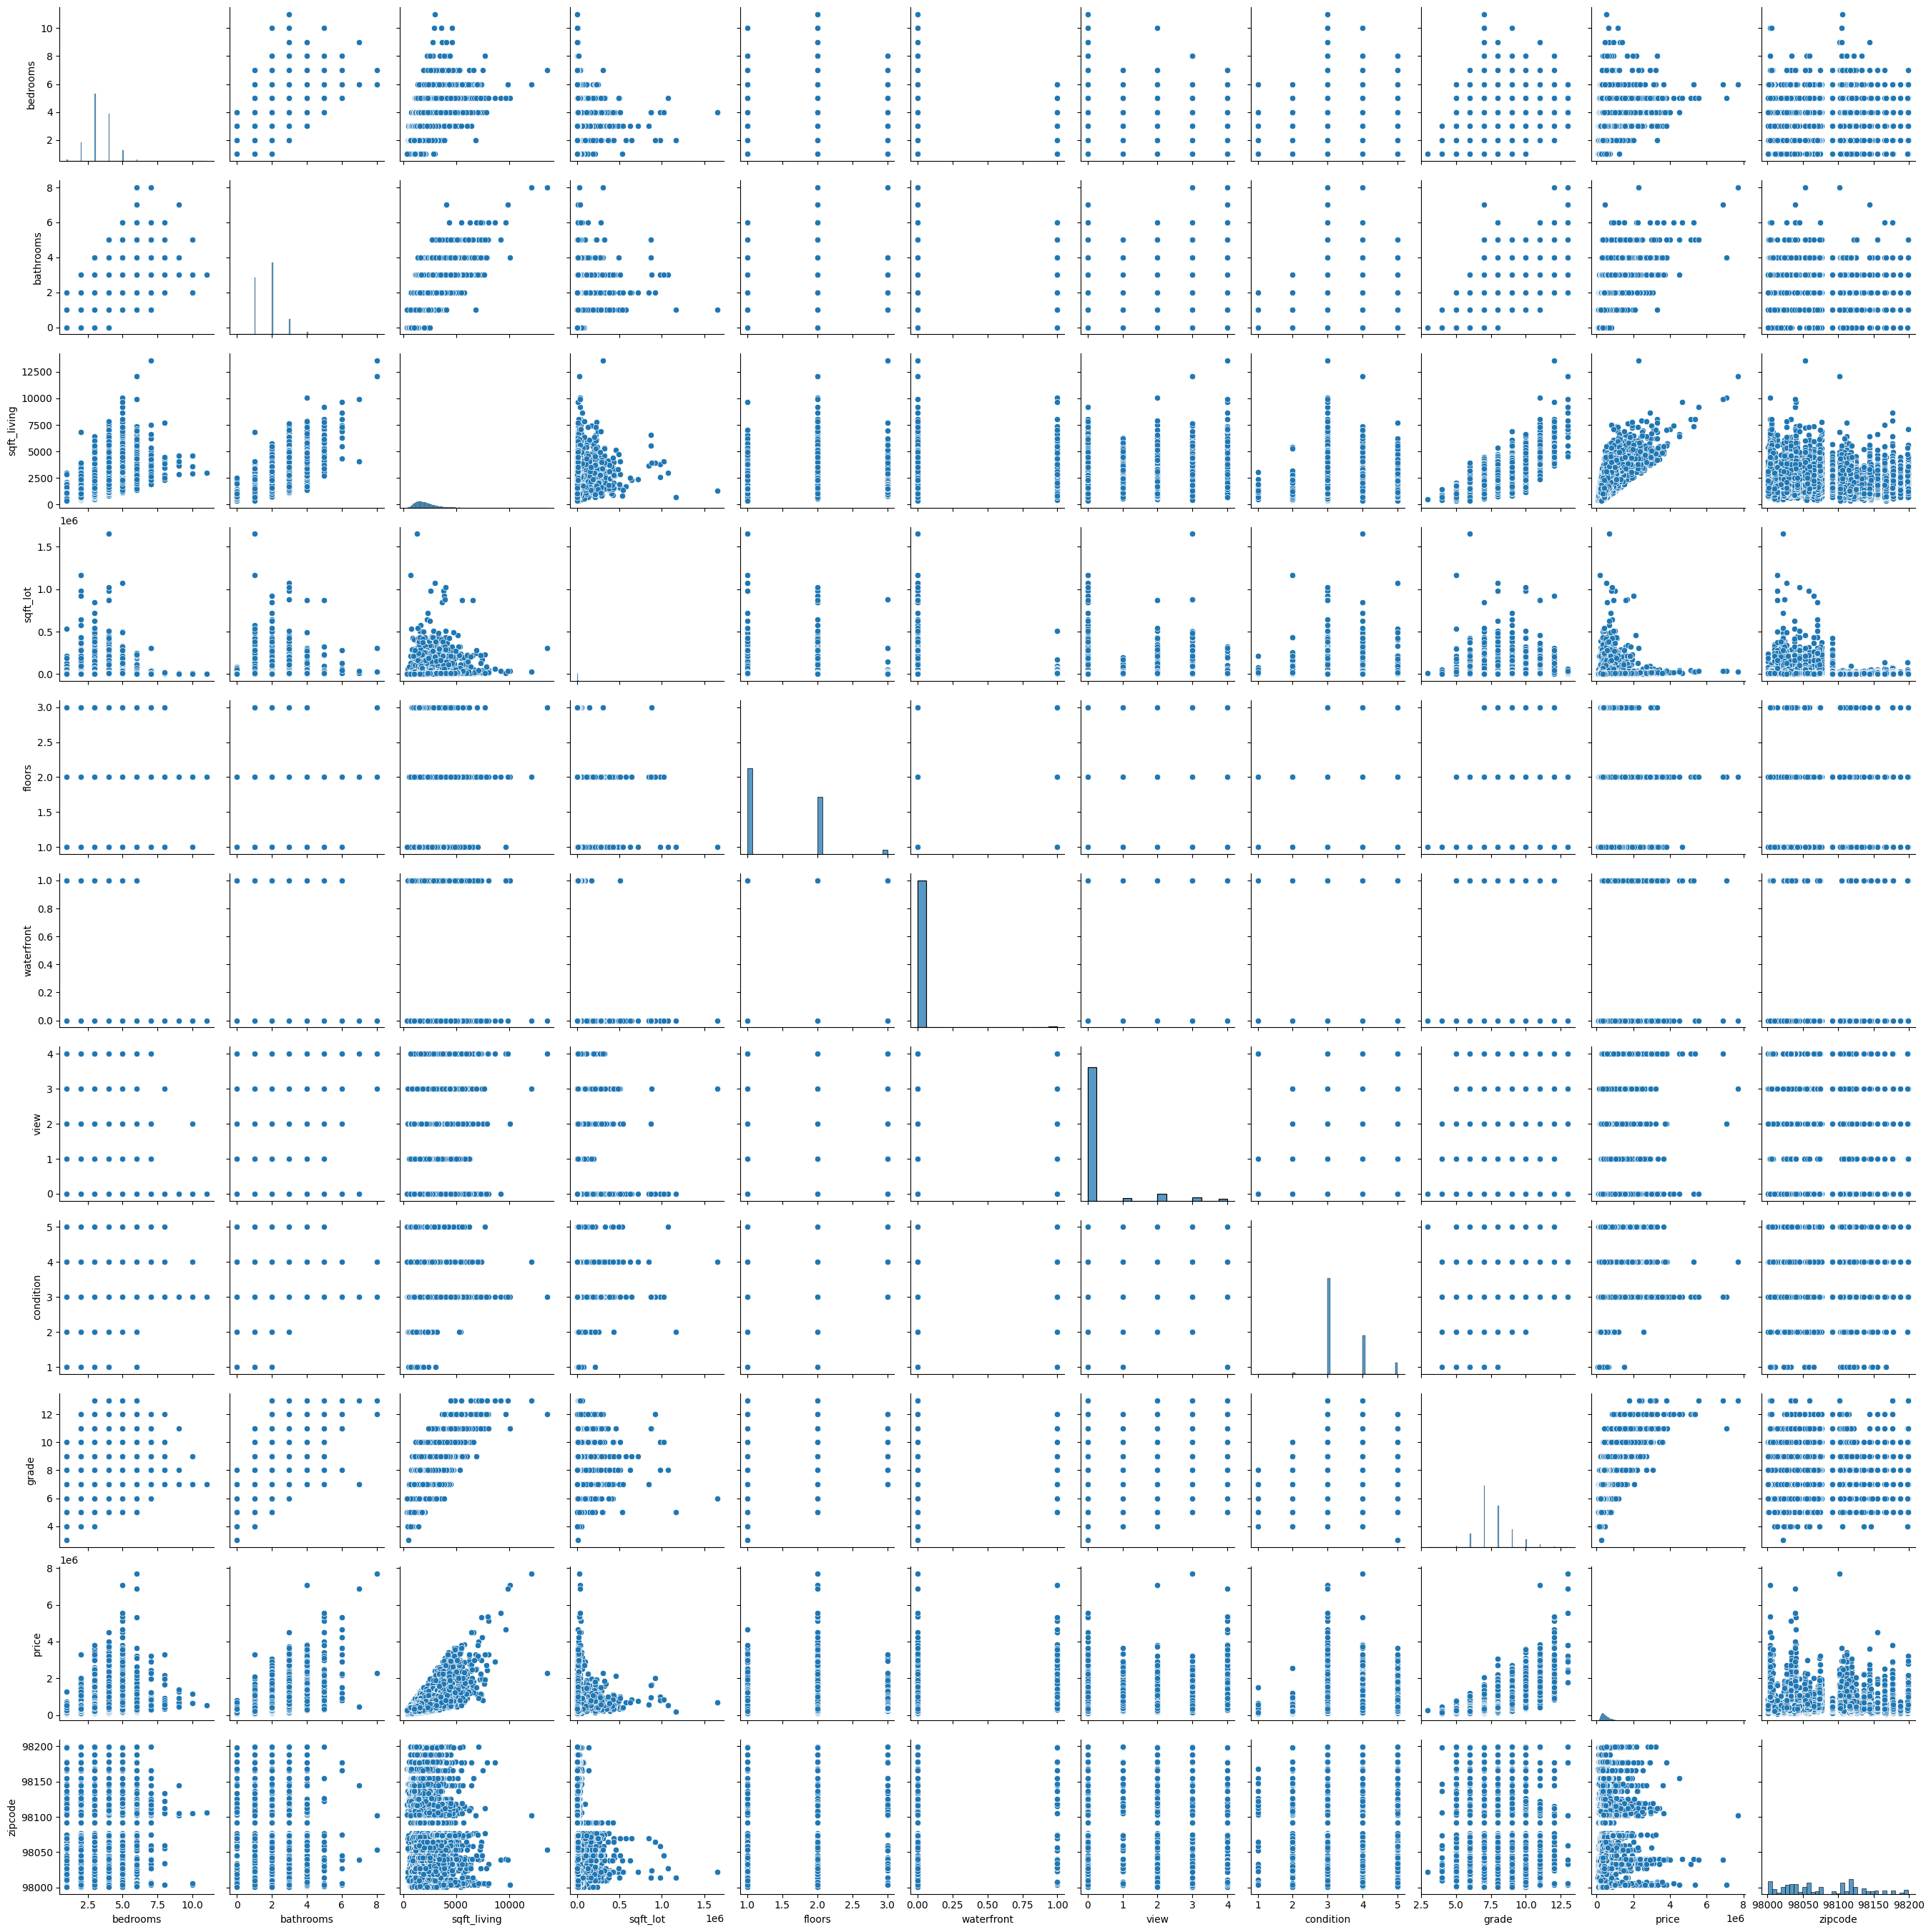

In [47]:
sns.pairplot(df_filter)


> **Main correlation matrix showing the most important results:**

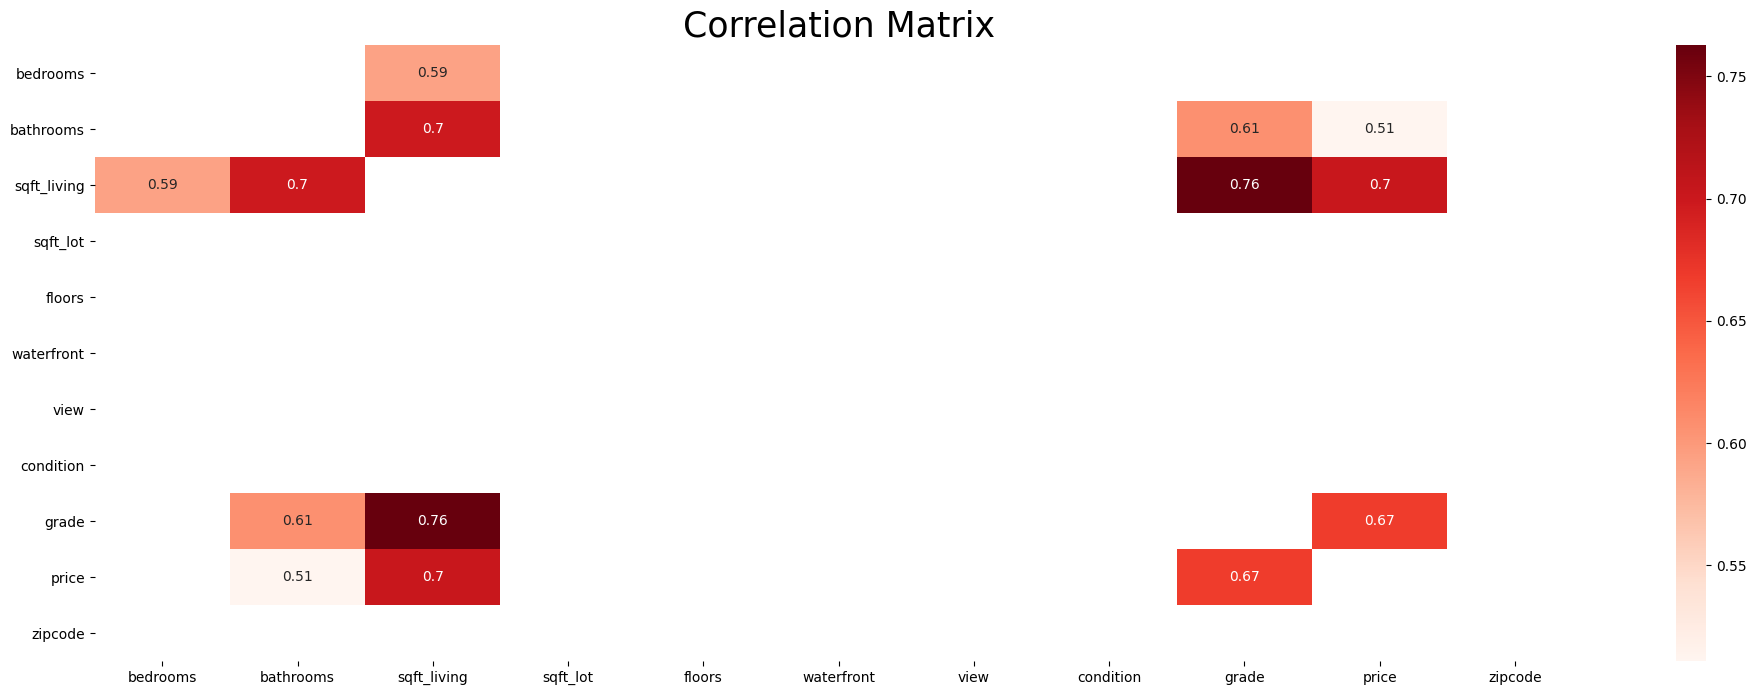

In [48]:
dfCorr = df_filter.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(24,8))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.title('Correlation Matrix', fontsize=25)
plt.show()

> **Top results function:**

In [49]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

corrFilter(df_filter, .7)

sqft_living  price       0.701929
             grade       0.762776
bedrooms     bedrooms         NaN
dtype: float64

> **Results of the matrix above:**

**High correlation:**
* sqft_living and grade
* sqft_living and bathrooms
* sqft_living and price

**Medium correlation:**
* Grade and bathrooms
* Grade and price
* sqft_living and bedrooms

**Low correlation:**
* Price and bathrooms

> **Main points of interest:**

Highly True: "Bigger houses have more bathrooms, better grade and are more expensive"

Medium true: "The higher the grade is, more bathrooms it has and higher is the price. Also, the bigger the house is, more bedrooms it has."

Least true: "The more bathrooms it has, higher is the price."

In [50]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

corrFilter(df_filter, .7)

sqft_living  price       0.701929
             grade       0.762776
bedrooms     bedrooms         NaN
dtype: float64

> **Does more money get you a better house? SHould price be the main focus?**

In [51]:
df_filter.price.mean()

540291.9567512502

count    2.159600e+04
mean     5.402920e+05
std      3.673760e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


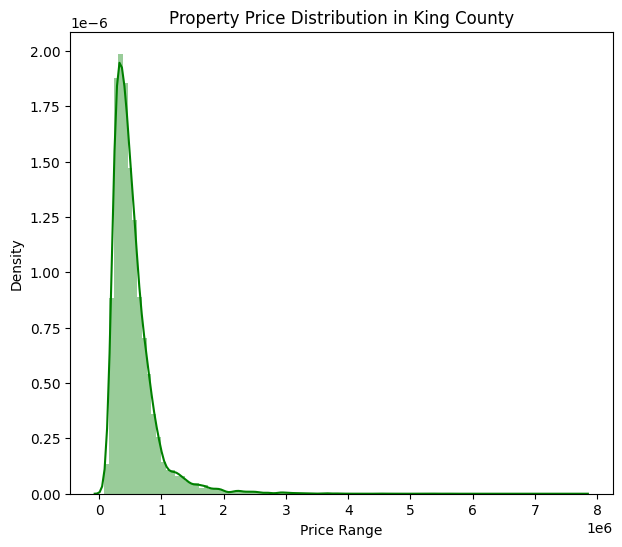

In [52]:
print(df_filter['price'].describe())
plt.figure(figsize=(7, 6))
sns.distplot(df_filter['price'], color='g', bins=100, hist_kws={'alpha': 0.4})
plt.title("Property Price Distribution in King County")
plt.xlabel("Price Range")
plt.ylabel("Density") ;

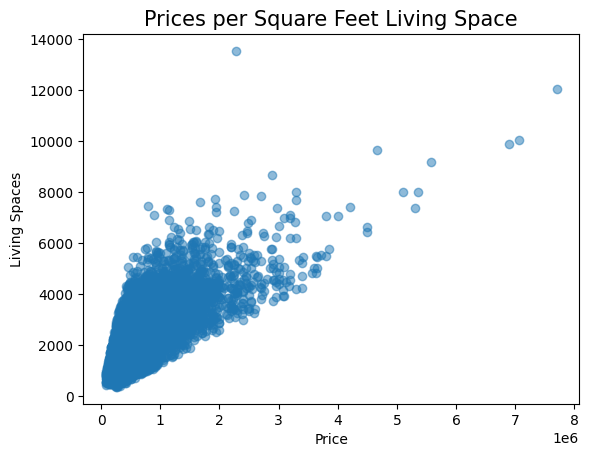

In [53]:
import numpy as np
import matplotlib.pyplot as plt



plt.scatter(x=df_filter['price'], y=df_filter['sqft_living'], alpha=0.5)
plt.title('Prices per Square Feet Living Space', fontsize=15)
plt.xlabel('Price')
plt.ylabel('Living Spaces')
plt.show()


**No!**

Actually, focusing on bigger living spaces brings you better properties than just looking by price.

- Lowest price: $ 78.000
- Highest price: $ 7.700.000
- Average Price: $ 540.292

---
### <span style="color:navy">__Insights and answers to the questions__

* Highly True: "Bigger houses have more bathrooms, better grade and are more expensive"
* Medium true: "The higher the grade is, more bathrooms it has and higher is the price. Also, the bigger the house is, more bedrooms it has."
* Least true: "The more bathrooms it has, higher is the price."

| # | Questions clarified | Answer | 
| ---- | ------------------------------------------------ | ---------------------------------------------------------------------------------- |
| 1 | Is there a relationship between high grades and the property's price? | Yes, the better the grade is, higher is the price, but also it has more living space and bathrooms to offer. |   
| 2 | Should you choose by price or by grade? | Choosing by grade is a better approach, as some houses are just too overpriced. Also it correlates with having more bathrooms and bigger living spaces.|
| 3 | Should we focus on higher living spaces or on bigger lots? | The bigger the house is, more it has to offer, but it doesn't mean that bigger lots get you bigger houses.|
| 4 | Should we focus on more expensive houses to get a bigger living space with more bedrooms and bathrooms? | Actually, focusing on bigger living spaces brings you better properties than just looking by price. |


---
### <span style="color:navy">__House recommendations__

![House Recommendations](/Users/karine_real/Neue_Fische/ds-eda-project-houses/table_recommendations.png "Recommendations") 